In [14]:
import pandas as pd

# Specify column names based on your dataset
column_names = ['Tweet ID', 'topic', 'sentiment','Tweet content'] 

df=pd.read_csv("twitter_training.csv",names=column_names)

# Display the first few rows of the dataframe
df

,Tweet ID,topic,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [15]:
df['sentiment'].value_counts()

sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

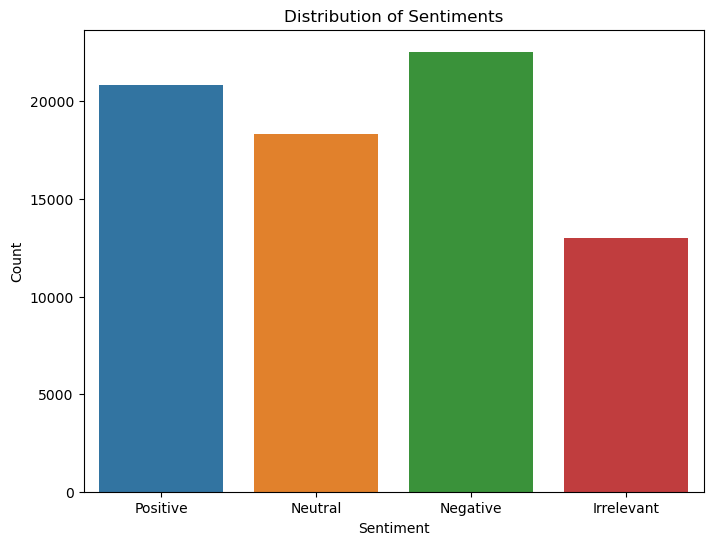

sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Print sentiment value counts
print(df['sentiment'].value_counts())


<Figure size 1500x800 with 0 Axes>

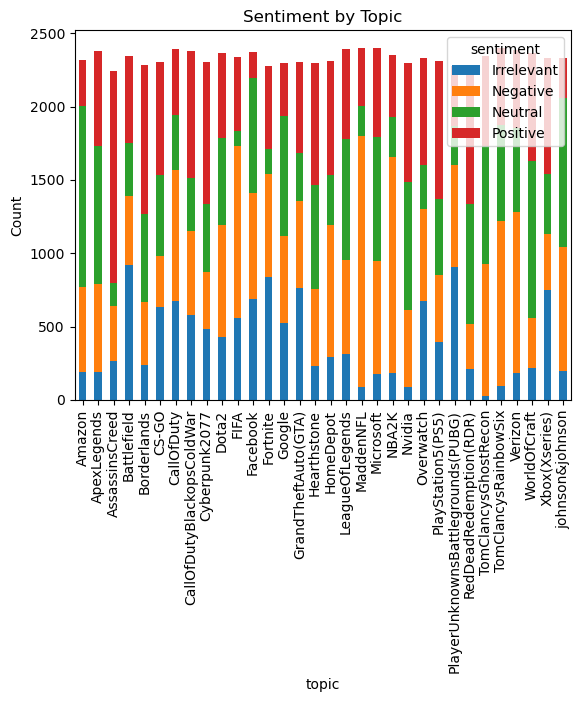

In [31]:
# Analyze sentiment by topic
plt.figure(figsize=(15,8))
sentiment_by_topic = df.groupby(['topic', 'sentiment']).size().unstack(fill_value=0)
sentiment_by_topic.plot(kind='bar', stacked=True)
plt.title('Sentiment by Topic')
plt.xlabel('topic')
plt.ylabel('Count')
plt.show()

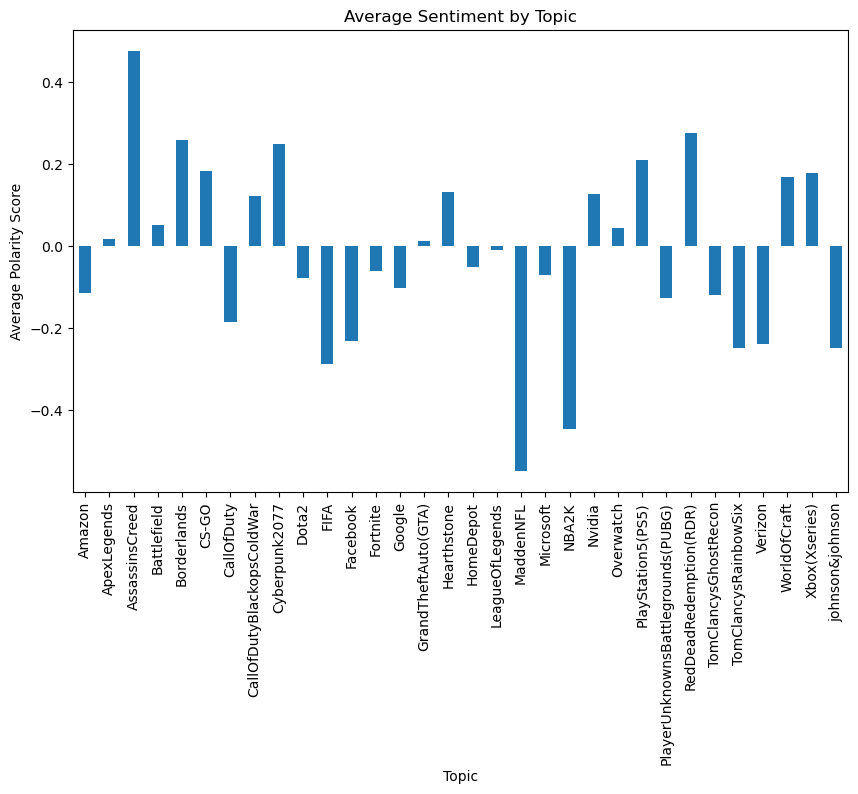

In [35]:
# Map sentiment values to numeric scores
sentiment_mapping = {
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1,
    'Irrelevant': 0  # You can change this if you want to handle 'Irrelevant' differently
}
df['sentiment'] = df['sentiment'].map(sentiment_mapping)



plt.figure(figsize=(10, 6))
average_polarity_by_topic = df.groupby('topic')['sentiment'].mean()
average_polarity_by_topic.plot(kind='bar')
plt.title('Average Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Polarity Score')
plt.show()

In [43]:
from textblob import TextBlob

# Define a function to handle non-string values
def analyze_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        return 0.0
    


df['Polarity'] = df['Tweet content'].apply(analyze_sentiment)

In [44]:
# Visualize the most positive and negative tweets
most_positive_tweet = df[df['Polarity'] == df['Polarity'].max()]['Tweet content'].values[0]
most_negative_tweet = df[df['Polarity'] == df['Polarity'].min()]['Tweet content'].values[0]

print('Most Positive Tweet:')
print(most_positive_tweet)

print('\nMost Negative Tweet:')
print(most_negative_tweet)

Most Positive Tweet:
Platinum is the best loot @Borderlands  

Most Negative Tweet:
"What terrible bitch!"
